In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

In [2]:
df = pd.read_csv('GSrates.csv')
df

Gold  Silver
0   90705    1170
1   91135    1170
2   90880    1170
3   90705    1183
4   91650    1183
..    ...     ...
94  82305    1076
95  79730    1003
96  79560    1003
97  78530     982
98  78360     986

[99 rows x 2 columns]

In [3]:
gold = df.to_numpy()[:,0]
silver = df.to_numpy()[:,1]
print(f"Gold: {gold}")
print(f"Silver: {silver}")

Gold: [90705 91135 90880 90705 91650 91050 91135 90280 90020 90190 89590 89590
 90105 90190 90020 90020 89080 88650 88480 88735 89080 88565 87705 88390
 88220 87965 87190 87190 86935 86505 86675 86335 86165 86165 85990 87020
 86765 86075 86165 86165 85650 85990 86590 85735 85905 86165 85990 85475
 85135 85135 85650 85305 84960 84105 83675 83505 83590 83850 83850 83850
 82990 83335 83590 84105 84020 84360 84190 83335 83420 82905 81790 81790
 80590 80845 81020 79820 79905 80245 79820 79730 79730 80590 80590 80590
 79305 79820 79905 80075 79990 79820 80675 80760 80590 81620 82305 79730
 79560 78530 78360]
Silver: [1170 1170 1170 1183 1183 1170 1170 1183 1179 1179 1162 1179 1192 1200
 1192 1192 1170 1166 1170 1170 1192 1183 1170 1187 1200 1209 1200 1200
 1196 1183 1200 1192 1192 1192 1192 1204 1200 1179 1183 1183 1174 1183
 1200 1192 1192 1200 1192 1166 1157 1157 1187 1174 1153 1140 1106 1101
 1101 1110 1110 1119 1093 1097 1084 1097 1101 1110 1136 1110 1114 1110
 1102 1110 1084 1084 1093 1

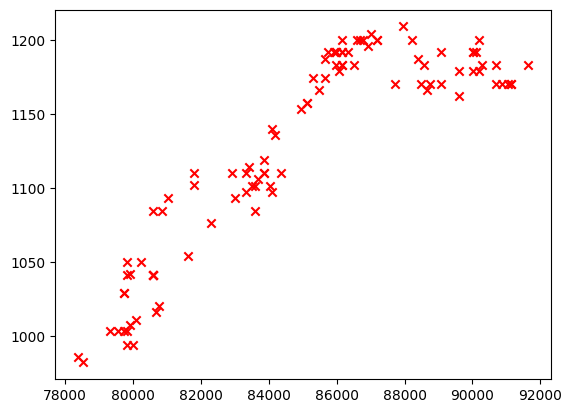

In [4]:
plt.scatter(gold,silver,marker='x',c='r')

In [5]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
     
    for i in range(m):
        f_wb= w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        total_cost = total_cost + cost
        
    total = (1/(2*m))* total_cost

    return total

In [6]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

[362276268836.1768, 90807280358.27274, 626305.8737373737, 89856306678.97981, 360374321477.59094]


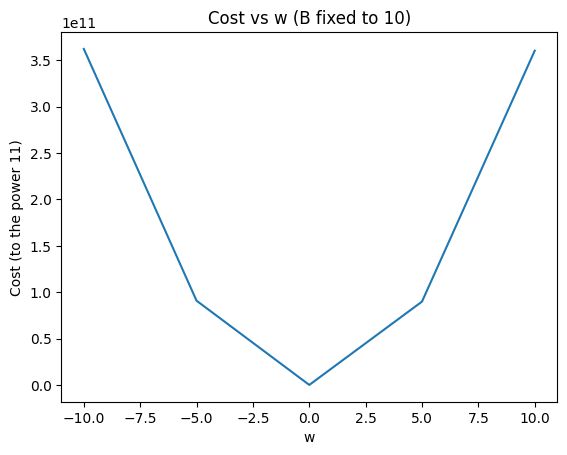

In [14]:
fix_b = 10
w = np.linspace(-10,10,5)
len = w.shape[0]
cost = []

for i in range(len):
    cost.append(compute_cost(gold,silver,w[i],fix_b))
    
print(cost)

plt.title("Cost vs w (B fixed to 10)")
plt.xlabel('w')
plt.ylabel('Cost (to the power 11)')
plt.plot(w,cost)

In [15]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

Iteration    0: Cost   953.20   
Iteration 1700: Cost   953.20   
Iteration 3400: Cost   953.20   
Iteration 5100: Cost   953.20   
Iteration 6800: Cost   953.20   
Iteration 8500: Cost   953.20   
Iteration 10200: Cost   953.20   
Iteration 11900: Cost   953.20   
Iteration 13600: Cost   953.20   
Iteration 15300: Cost   953.20   
b,w found by gradient descent: 260.00,0.010000000003037501 
prediction: 1167.05, target value: 1170
prediction: 1171.35, target value: 1170
prediction: 1168.80, target value: 1170
prediction: 1167.05, target value: 1183
prediction: 1176.50, target value: 1183


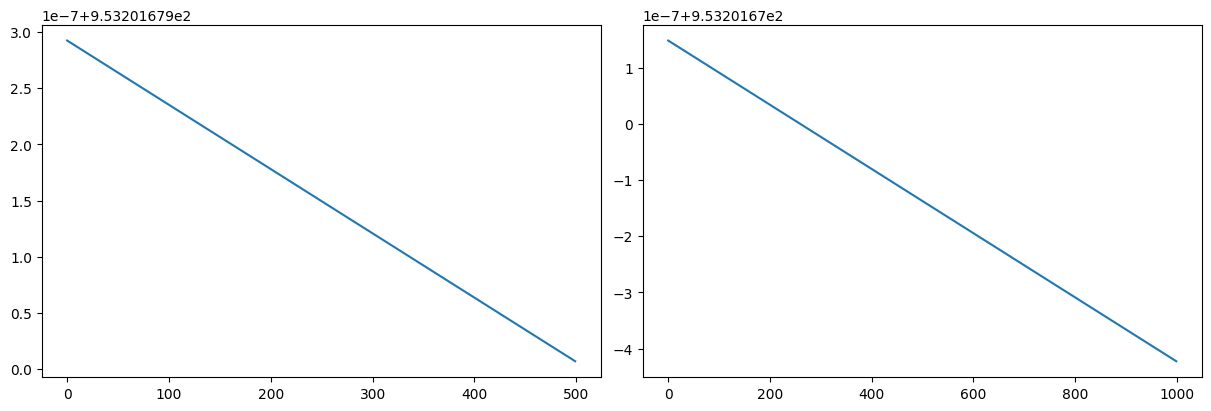

In [161]:
# initialize parameters
initial_w = 0.01
initial_b = 260


# some gradient descent settings
iterations = 17000
alpha = 1e-17


# run gradient descent 
w_final, b_final, J_hist = gradient_descent(gold, silver, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)


print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m= gold.shape[0]

for i in range(5):
    print(f"prediction: {np.dot(gold[i], w_final) + b_final:0.2f}, target value: {silver[i]}")

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:500])
ax2.plot(J_hist[16000:])

In [162]:
m = gold.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * gold[i] + b_final

Text(0, 0.5, 'Silver')

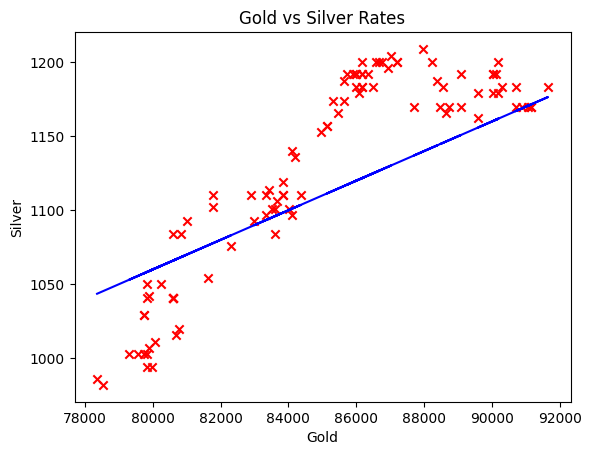

In [163]:
plt.plot(gold,predicted,c='b')
plt.scatter(gold,silver,marker="x",c='r')

plt.title("Gold vs Silver Rates")
plt.xlabel("Gold")
plt.ylabel("Silver")

In [166]:
gold_price = int(input("Enter the price of gold: "))
predict = gold_price * w_final + b_final
print(f"When the rate of gold per 10gm is {gold_price}, the expected price of silver is {predict:0.2f}.")

Enter the price of gold: 91135
When the rate of gold per 10gm is 91135, the expected price of silver is 1171.35.
